## 생능출판사 (가칭)"데이터과학 파이썬" 코드 14장

### 14.6 선형 회귀를 scikit-learn 라이브러리로 구현해 보자

In [ ]:
import numpy as np 
from sklearn import linear_model  # scikit-learn 모듈을 가져온다

regr = linear_model.LinearRegression()

In [ ]:
X = [[164], [179], [162], [170]]  # 다중회귀에도 사용하도록 함 
y = [53, 63, 55, 59]              # y = f(X)의 결과 
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 14.6 선형 회귀 학습결과를 확인하고 예측하기

In [ ]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coef = regr.coef_           # 직선의 기울기
intercept = regr.intercept_ # 직선의 절편
score = regr.score(X, y)    # 학습된 직선이 데이터를 얼마나 잘 따르나

print("y =", coef, "* X + ", intercept)
print("The score of this line for the data: ", score)

y = [0.55221745] * X +  -35.686695278969964
The score of this line for the data:  0.903203123105647


In [ ]:
input_data = [ [180], [185] ]

### 14.8 선형회귀로 예측하기 : 키와 몸무게는 상관관계가 있을까

In [ ]:
regr.predict([[169]])

array([57.63805436])

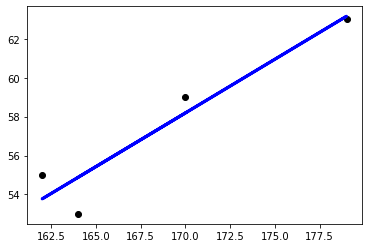

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import linear_model  # scikit-learn 모듈을 가져온다
 
regr = linear_model.LinearRegression() 
 
X = [[164], [179], [162], [170]]  # 선형회귀의 입력은 2차원으로 만들어야 함
y = [53, 63, 55, 59]     # y = f(X)의 결과값
regr.fit(X, y)

# 학습 데이터와 y 값을 산포도로 그린다. 
plt.scatter(X, y, color='black')

# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = regr.predict(X)

# 학습 데이터와 예측값으로 선그래프로 그린다. 
# 계산된 기울기와 y 절편을 가지는 직선이 그려진다 
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.show()

### LAB 14-1 다차원 선형회귀

In [ ]:
import numpy as np 
from sklearn import linear_model 
 
regr = linear_model.LinearRegression() 
# 남자는 0, 여자는 1
X = [[164, 1], [167, 1], [165, 0], [170, 0], [179, 0], [163, 1], [159, 0], [166, 1]]    # 입력데이터를 2차원으로 만들어야 함 
y = [43, 48, 47, 66, 67, 50, 52, 44]     # y 값은 1차원 데이터
regr.fit(X, y)         # 학습 
print('계수 :', regr.coef_ )
print('절편 :', regr.intercept_)
print('점수 :', regr.score(X, y))
print('은지와 동민이의 추정 몸무게 :', regr.predict([[166, 1], [166, 0]]))

계수 : [ 0.88542825 -8.87235818]
절편 : -90.97330367074522
점수 : 0.7404546306026769
은지와 동민이의 추정 몸무게 : [47.13542825 56.00778643]


### 14.8 당뇨병 예제와 학습 데이터 생성

In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn import datasets 
 
# 당뇨병 데이터 세트를 sklearn의 데이터집합으로부터 읽어들인다. 
diabetes = datasets.load_diabetes()

In [4]:
print('shape of diabetes.data: ', diabetes.data.shape)
# 10개의 특성을 가지는 442개의 데이터가 있음
print(diabetes.data)

shape of diabetes.data:  (442, 10)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [5]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [6]:
print('입력데이터의 특성들')
print(diabetes.feature_names)

입력데이터의 특성들
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
# 당뇨수치 값이 들어있는 target 데이터

print('target data y:', diabetes.target.shape)
print(diabetes.target)

target data y: (442,)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91.

In [ ]:
# bmi 값만을 추출함
X = diabetes.data[:, 2]
print(X)

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215 -0.08380842  0.01750591
 -0.02884001 -0.00189471 -0.02560657 -0.01806189  0.04229559  0.01211685
 -0.0105172  -0.01806189 -0.05686312 -0.02237314 -0.00405033  0.06061839
  0.03582872 -0.01267283 -0.07734155  0.05954058 -0.02129532 -0.00620595
  0.04445121 -0.06548562  0.12528712 -0.05039625 -0.06332999 -0.03099563
  0.02289497  0.01103904  0.07139652  0.01427248 -0.00836158 -0.06764124
 -0.0105172  -0.02345095  0.06816308 -0.03530688 -0.01159501 -0.0730303
 -0.04177375  0.01427248 -0.00728377  0.0164281  -0.00943939 -0.01590626
  0.0250506  -0.04931844  0.04121778 -0.06332999 -0.06440781 -0.02560657
 -0.00405033  0.00457217 -0.00728377 -0.0374625  -0.02560657 -0.02452876
 -0.01806189 -0.01482845 -0.02991782 -0.046085   -0.06979687  0.03367309
 -0.00405033 -0.02021751  0.00241654 -0.03099563  0.02828403 -0.03638469
 -0.05794093 -0.0374625   0.01211685 -0.02237314 -0.

In [ ]:
print('{:10.9f}'.format(np.mean(X)))

-0.000000000


## BMI와 target과의 상관관계 알아보자

In [7]:
import numpy as np
from sklearn import datasets 

# 당뇨병 데이터 세트를 sklearn의 데이터집합으로부터 읽어들인다. 
diabetes = datasets.load_diabetes()

# BMI 값을 1차원 배열로 추출함
X = diabetes.data[:, 2]

# BMI 값과 target 값의 상관계수 구하기
np.corrcoef(X, diabetes.target)

array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

In [ ]:
# bmi 값을 2차원 배열로 추출함
X = diabetes.data[:, np.newaxis, 2]
print(X)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

### 14.10 체질량지수bmi와 당뇨수치는 어떤 상관관계가 있을까

In [8]:
from sklearn import linear_model 

# bmi 값을 2차원 배열로 추출함
X = diabetes.data[:, np.newaxis, 5]
print(X)
 
regr = linear_model.LinearRegression() 

regr.fit(X, diabetes.target)         # 학습을 통한 선형회귀 모델을 생성 
print(regr.coef_, regr.intercept_)

[[-3.48207628e-02]
 [-1.91633397e-02]
 [-3.41944659e-02]
 [ 2.49905934e-02]
 [ 1.55961395e-02]
 [-7.92878444e-02]
 [-2.48000121e-02]
 [ 1.08914381e-01]
 [ 6.20168566e-03]
 [-3.45076144e-02]
 [-9.05611890e-02]
 [ 4.59715403e-02]
 [-9.76888589e-03]
 [-1.57187067e-02]
 [-6.12835791e-05]
 [ 1.07661787e-01]
 [-2.38605667e-02]
 [ 4.94161734e-02]
 [-1.94764882e-02]
 [-1.13346282e-02]
 [-4.32757713e-02]
 [-2.63657544e-02]
 [ 7.76742797e-03]
 [-4.73467013e-02]
 [-1.88501913e-02]
 [ 4.63594335e-03]
 [-9.61978613e-02]
 [-4.35889198e-02]
 [-3.76390990e-02]
 [-9.58847129e-02]
 [-7.57684666e-03]
 [-5.36096705e-02]
 [-1.29003705e-02]
 [-8.99348921e-02]
 [-4.89124436e-02]
 [-4.13221358e-03]
 [-2.85577936e-02]
 [-4.29626228e-02]
 [ 7.54074957e-02]
 [ 6.20168566e-03]
 [ 7.32154565e-02]
 [-7.27117267e-02]
 [-2.35474182e-02]
 [-1.00820344e-02]
 [ 4.63594335e-03]
 [ 1.50445873e-03]
 [-4.76598498e-02]
 [-7.42774690e-02]
 [ 5.88853719e-03]
 [ 6.20168566e-03]
 [-3.73259505e-02]
 [-2.91840905e-02]
 [ 4.4718946

In [13]:
# 학습 데이터와 테스트 데이터를 분리한다. 
from sklearn.model_selection import train_test_split

# 선형회귀를 위해 diabetes 데이터의 모든 특징을 사용하는 예제
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                    test_size=0.2)
regr = LinearRegression() 
regr.fit(X_train, y_train)

score = regr.score(X_train, y_train)
print(score)
score = regr.score(X_test, y_test)
print(score)

0.5098894403903235
0.5320567926087021


In [19]:
# 학습 데이터와 테스트 데이터를 분리한다. 
from sklearn.model_selection import train_test_split

# 선형회귀를 위해 diabetes 데이터의 BMI 특징을 사용하는 예제
X_train, X_test, y_train, y_test = train_test_split(diabetes.data[:,np.newaxis,2],
                                                    diabetes.target,
                                                    test_size=0.2) 
regr = LinearRegression() 
regr.fit(X_train, y_train)

score = regr.score(X_train, y_train)
print(score)
score = regr.score(X_test, y_test)
print(score)

0.32531760967050194
0.4121367426717929


In [15]:
score = regr.score(X_train, y_train)
print(score)
score = regr.score(X_test, y_test)
print(score)

0.34774850093494614
0.3064329829535696


### 14.10 당뇨병 예제를 학습 데이터와 테스트 데이터로 구분하자

In [16]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                    test_size=0.2)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)     # 테스트 데이터로 예측해보자.

In [17]:
print(y_pred)
print(y_test)

[ 98.78163019 121.97149219 172.98220704  82.13312345 206.13195262
 246.92284845 137.53737502 205.44167277 251.57388476 122.44492808
 101.68097121  68.43799973  60.32471992 146.14259058 110.62780122
 107.11082852 186.55802276 135.47067767 118.89408996 162.7721758
  65.52996762 238.22013162 144.49275342 190.91874151 178.41840933
 227.41720413 248.61217782 260.03465383 127.51501536 108.44323904
 215.75945402 161.92005111 144.78279917 170.06662062 126.18936819
  91.543326    63.05769833 145.296352   265.5015592   85.65290658
 212.70257549 177.27777992 178.60232661 158.45682956 167.62365771
  72.50155653 161.86121429 221.14922216 127.79401486 158.40684636
 100.08552062 131.56265327 117.9376632  139.53284451 156.8417486
 144.18267865 180.97245958 158.63829473 181.27413544 130.23229195
 160.41422152 155.27413463 156.38820039 181.16534208 185.69199777
  90.26165694 209.71469497 131.24694411 125.03053706  94.91094818
 210.35933632 166.21805428 144.8773529  182.4915213  127.05149626
 188.9002241

### LAB 14-1 데이터 80%로 학습하여 예측한 결과와 실제 데이터 비교

[  -11.11941321  -279.03057649   514.29579442   341.84171784
 -1121.06164111   714.52507742   235.54919654   203.89979632
   881.15591714    64.05227476] 151.2417737586206


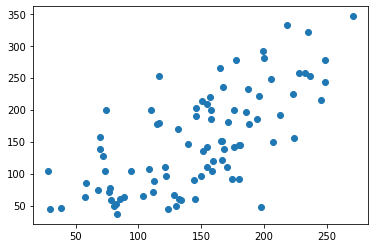

In [18]:
import numpy as np 
from sklearn import linear_model  # scikit-learn 모듈을 가져온다
from sklearn import datasets
import matplotlib.pyplot as plt

regr = linear_model.LinearRegression() 
# 학습 데이터와 테스트 데이터를 분리한다. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                    diabetes.target,
                                                    test_size=0.2) 
regr.fit(X_train, y_train)
print(regr.coef_, regr.intercept_)

y_pred = regr.predict(X_test)

plt.scatter(y_pred, y_test)
plt.show()

### 14.11 알고리즘이 가지는 오차

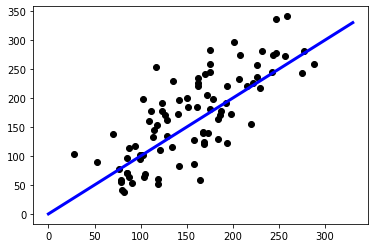

In [ ]:
plt.scatter(y_pred, y_test,  color='black')

x = np.linspace(0, 330, 100)  # 특정 구간의 점 
plt.plot(x, x, linewidth = 3, color = 'blue')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

... # 이전 절에서 구한 선형회귀 모델의 코드를 삽입함        

print('Mean squared error:', mean_squared_error(y_test, y_pred))

Mean squared error: 2450.864111510396


### 14.14 아름다운 붓꽃의 종류를 분류할 준비를 해보자

In [ ]:
from sklearn.datasets import load_iris 
iris = load_iris() 
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
iris.data.shape

(150, 4)

### 14.15 k-NN 알고리즘을 적용할 데이터를 살펴보자 

In [ ]:
print(iris.feature_names) # 4개의 특징 이름을 출력한다.

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# 정수는 꽃의 종류를 나타낸다.: 0 = setosa, 1=versicolor, 2=virginica 
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 14.16 k-NN 알고리즘을 적용해보자

In [ ]:
# (80:20)으로 분할한다. 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 

iris = load_iris() 
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

num_neigh = 1
knn = KNeighborsClassifier(n_neighbors = num_neigh) 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test) 
scores = metrics.accuracy_score(y_test, y_pred) 
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(num_neigh, scores))

n_neighbors가 1일때 정확도: 0.967


In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

num_neigh = 3
knn = KNeighborsClassifier(n_neighbors = num_neigh) 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test) 
scores = metrics.accuracy_score(y_test, y_pred) 
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(num_neigh, scores))

n_neighbors가 3일때 정확도: 0.967


In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

num_neigh = 5
knn = KNeighborsClassifier(n_neighbors = num_neigh) 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test) 
scores = metrics.accuracy_score(y_test, y_pred) 
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(num_neigh, scores))

n_neighbors가 5일때 정확도: 0.967


### 14.17 새로운 꽃에 대해서 모델을 적용해서 분류해보자

In [ ]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
 
iris = load_iris() 
knn = KNeighborsClassifier(n_neighbors=6) 
knn.fit(iris.data, iris.target) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'} 
 
# 아직 보지 못한 새로운 데이터를 제시해보자. 
X = [[3,4,5,2], 
[5,4,2,2]] 
y = knn.predict(X) 
 
print(classes[y[0]]) 
print(classes[y[1]]) 

versicolor
setosa


### 14.19 보스턴 집값 데이터 읽어오기와 결측 확인하기

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns    # 시각화를 위하여 Seaborn 라이브러리를 이용함
 
from sklearn.datasets import load_boston 
boston = load_boston() 
 
df = pd.DataFrame(boston.data, columns=boston.feature_names) 
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df['MEDV'] = boston.target 

In [ ]:
print( df.isnull().sum() )

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### 14.20 각 특징들 사이의 상관관계를 살펴보자

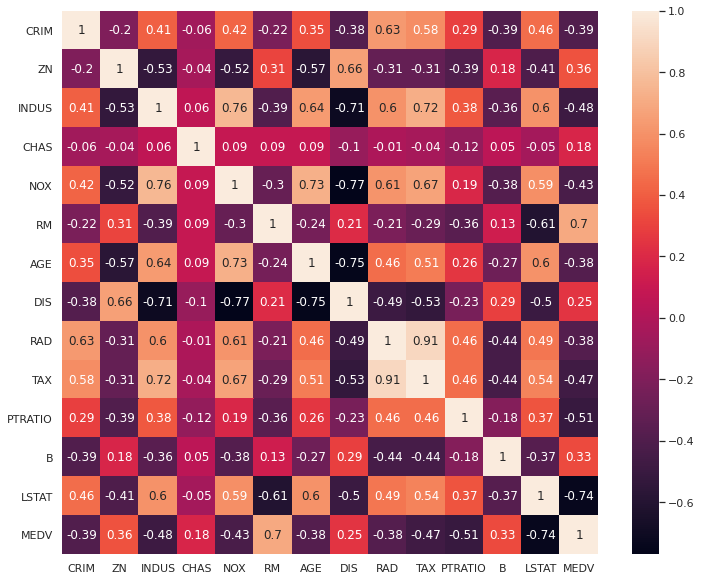

In [ ]:
sns.set(rc={'figure.figsize':(12,10)}) 
correlation_matrix = df.corr().round(2) 
sns.heatmap(data=correlation_matrix, annot=True) 
plt.show()

### 14.22 어떤 특징들이 서로 상관관계가 있을까

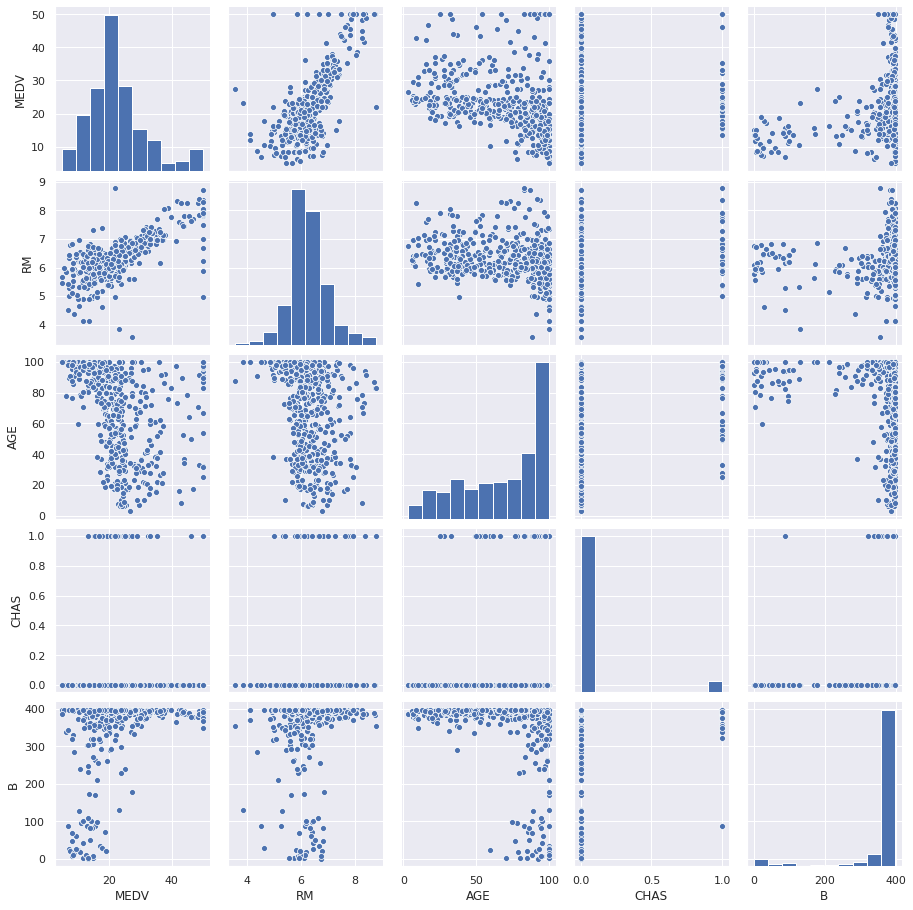

In [ ]:
sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS", "B"]])
plt.show()

### 14.21 간단한 회귀모델을 만들자

In [ ]:
X = df[['LSTAT', 'RM']] 
y = df['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 

lin_model = LinearRegression() 
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_test_predict = lin_model.predict(X_test) 
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('RMSE =', rmse)

RMSE = 5.326080132662354
